In [21]:
import PyPlot; plt = PyPlot

using MAT
using Revise
using Random
using CMF

**Load data**

In [2]:
folder = "/home/asd/data/mouse/"

# Load accelerometer data
mdict_agg = matread(folder * "agg.mat")
mdict_agg = mdict_agg["agg_unitstructure"]
acc = mdict_agg["acc_full"]
acc_sum = mdict_agg["acc"]

# Load labels
# TODO

println("Done")

Done


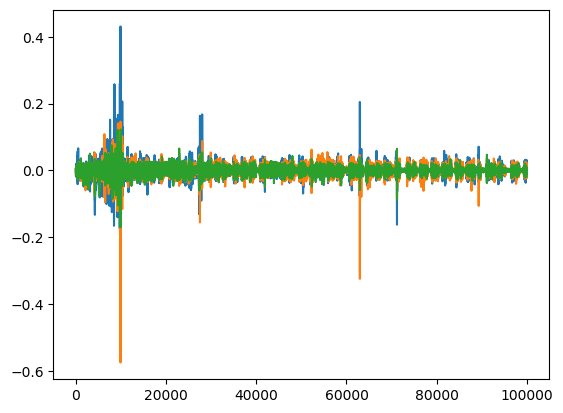

3-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fc6184834d0>
 PyObject <matplotlib.lines.Line2D object at 0x7fc618483710>
 PyObject <matplotlib.lines.Line2D object at 0x7fc6184838d0>

In [9]:
#plt.plot(acc[]')
size(acc)
plt.plot(acc[:, 1:100_000]')

**Fit data**

To make this work, we need to finish a few things
- Add masking
- Support negative data / factorizations (or rather partially nonnegative)
    - Quick fix: normalize to be between 0 and 1
- ??? Make everything in place to prevent OOM errors

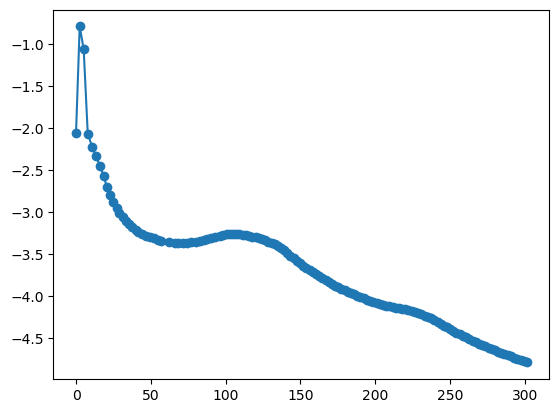

results.loss_hist[end - 5:end] = [0.008889136737587441, 0.008762153343424771, 0.008638784940117654, 0.008514669567831085, 0.008391993235235413, 0.008272175348843124]


6-element Array{Float64,1}:
 0.008889136737587441
 0.008762153343424771
 0.008638784940117654
 0.008514669567831085
 0.008391993235235413
 0.008272175348843124

In [134]:
# #Random.seed!(7)

# data = acc[:, 1:20_000]
# data = data .- minimum(data)
# data = data / maximum(data)
# data = min.(0.8, max.(data, 0.4))
# data = data .- minimum(data)
# data = data / maximum(data)

results = fit_cnmf(
    data; 
    L=30, K=10,
    l1H=3*0.2, 
    alg=HALSUpdate, 
    max_itr=Inf, 
    max_time=300,
    patience=5
)

plt.plot(results.time_hist, log.(results.loss_hist), marker="o")
@show results.loss_hist[end-5:end]

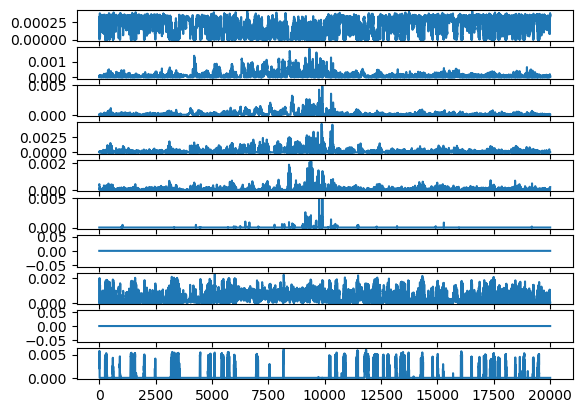

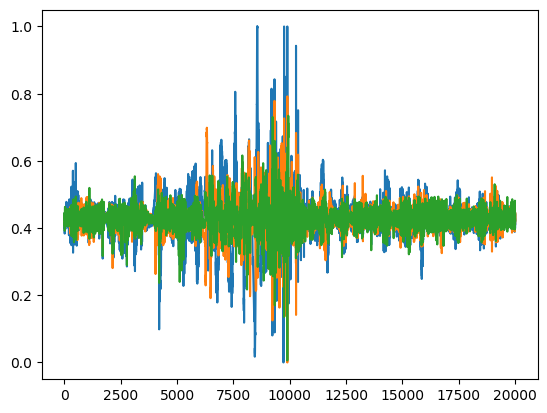

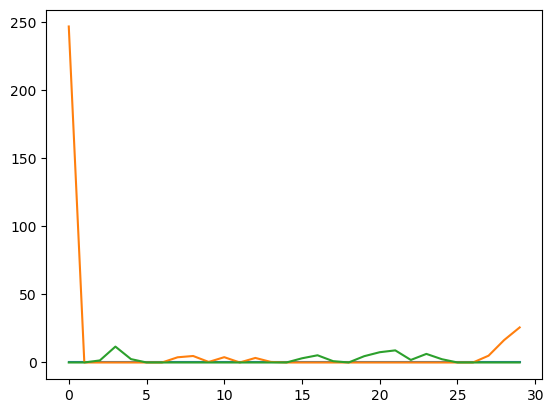

results.loss_hist = [0.12704669205174293, 0.4539533794195406, 0.3467451977667809, 0.1264268101080156, 0.10784938479880866, 0.09643376917395705, 0.08564916470662792, 0.07626035059791222, 0.0667569774099728, 0.060846075708418594, 0.055904578602867565, 0.05212213323061546, 0.04916182625498469, 0.04671736825438875, 0.04464252058435474, 0.04290349792387772, 0.04141952148731743, 0.040153152269863775, 0.039142451634521715, 0.03829242435260682, 0.03755295817373304, 0.03687212108572552, 0.03626195537700969, 0.035601184519702685, 0.03514836252190135, 0.03473490935719741, 0.03450138058574946, 0.03439293363359096, 0.03437436537135309, 0.034487532191946876, 0.034676771551261774, 0.034927064920730756, 0.03519712267943075, 0.03557304143510039, 0.03606518616492663, 0.03661140577296474, 0.03711512132790584, 0.03755377863453522, 0.037937069723583, 0.038197951732787415, 0.038331877650161494, 0.03839004994409184, 0.03834986931660136, 0.038217925616401686, 0.03802039391070696, 0.037767361563500405, 0.03748

3-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fc605d9f3d0>
 PyObject <matplotlib.lines.Line2D object at 0x7fc605d9f7d0>
 PyObject <matplotlib.lines.Line2D object at 0x7fc605d9f4d0>

In [135]:
@show results.loss_hist
plt.figure()
for k in 1:10
    plt.subplot(10, 1, k)
    plt.plot(results.H[k, :]')
end
plt.figure()
plt.plot(data')
plt.figure()
plt.plot(results.W[:, :, 2])